# WK05: Transformer Pipelines

## Setup

This code imports the functions we need to run our inference pipelines

In [2]:
!pip install diffusers transformers accelerate safetensors torchvision --upgrade
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124 --upgrade

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 3.2/3.2 MB 47.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   ---------------------------------------- 10.0/10.0 MB 154.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 86.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   ------- ------------------------------- 41.7/204.1 MB 204.0 MB/s eta 0:00:01
   ---------------- ---------------------- 88.1/204.1 MB 224.6 MB/s eta 0:00:01
   ------------------------ ------------- 130.5/204.1 MB 219.3 MB/s eta 0:00:01
   ------------------------------- ------ 169.3/204.1 MB 212.1 MB/s eta 0:00:01
   ------------------------------------ - 195.0/204.1 MB 194.8 MB/s eta 0:00:01
   ------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.5.1 requires torch==2.5.1, but you have torch 2.6.0 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu124
   ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 GB 144.6 MB/s eta 0:00:18
   - -------------------------------------- 0.1/2.5 GB 195.0 MB/s eta 0:00:13
   -- ------------------------------------- 0.1/2.5 GB 213.5 MB/s eta 0:00:12
   -- ------------------------------------- 0.2/2.5 GB 227.9 MB/s eta 0:00:11
   --- ------------------------------------ 0.2/2.5 GB 230.7 MB/s eta 0:00:10
   ---- ----------------------------------- 0.3/2.5 GB 239.4 MB/s eta 0:00:10
   ----- ---------------------------------- 0.3/2.5 GB 258.0 MB/s eta 0:00:09
   ------ --------------------------------- 0.4/2.5 GB 254.0 MB/s eta 0:00:09
   ------ --------------------------------- 0.4/2.5 GB 254.0 MB/s eta 0:00:09
   ------- -------------------------------- 0.5/2.5 GB 253.8 MB/s eta 0:00:09
   -------- --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
from PIL import Image
from transformers import pipeline

## Text Completion

Let's use the [GPT2 model](https://huggingface.co/openai-community/gpt2) to create some text completions.

We use a pipeline object to run inference:

In [2]:
generator = pipeline(
  "text-generation", #tag of what kind of model it is#
  model="openai-community/gpt2" #what comes after / in hugging face URL#
)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--openai-community--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


Let's define a starter sentence to run our model on:

In [3]:
TOBE = "To be or not to be, that is the"

And run the model:

In [4]:
result = generator(TOBE, max_length=64, pad_token_id=0) #max_length= how many other words you want the text to generate#
print(result)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': 'To be or not to be, that is the state of affairs in these days; and that is that the only thing to which some can say is that a man cannot have a wife and live to be in or be able to give a son. This, however, does not mean that not having a wife is one'}]


#### Changing [model](https://huggingface.co/Xenova/llama2.c-stories110M)

is as easy as:

In [5]:
generator = pipeline(
  "text-generation",
  model="Xenova/llama2.c-stories110M"
)

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--Xenova--llama2.c-stories110M. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Device set to use cuda:0


Rerun with new model:

In [6]:
result = generator(TOBE, max_length=64, pad_token_id=0)
print(result)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': 'To be or not to be, that is the best way to be. Toy was a little girl who loved to play. One day, Toy was playing in the garden when she saw a big, red tomato. She was so excited and wanted to pick it.\nToy asked her mom,'}]


### One last [model](https://huggingface.co/facebook/opt-125m):

In [7]:
generator = pipeline(
  "text-generation",
  model="facebook/opt-125m"
)

result = generator(TOBE, max_length=64, pad_token_id=0)
print(result)

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--facebook--opt-125m. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/251M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': 'To be or not to be, that is the question.\n\nI am not sure what to say.\n\nI am not sure what to say.\n\nI am not sure what to say.\n\nI am not sure what to say.\n\nI am not sure what to say.\n'}]


## Fill-Mask [model](https://huggingface.co/FacebookAI/xlm-roberta-large)

can be used to get the probabilities/scores of different possible words to complete a sentence:

In [8]:
filler = pipeline(
  "fill-mask", #
  model="FacebookAI/xlm-roberta-large"
)

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--FacebookAI--xlm-roberta-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at FacebookAI/xlm-roberta-large were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Device set to use cuda:0


In [10]:
input = f"{TOBE} <mask>"
result = filler(input)

In [12]:
result

[{'score': 0.753290593624115,
  'token': 9655,
  'token_str': 'question',
  'sequence': 'To be or not to be, that is the question'},
 {'score': 0.029897134751081467,
  'token': 31089,
  'token_str': 'issue',
  'sequence': 'To be or not to be, that is the issue'},
 {'score': 0.02034495584666729,
  'token': 26866,
  'token_str': 'matter',
  'sequence': 'To be or not to be, that is the matter'},
 {'score': 0.017492879182100296,
  'token': 35166,
  'token_str': 'answer',
  'sequence': 'To be or not to be, that is the answer'},
 {'score': 0.015843942761421204,
  'token': 60212,
  'token_str': 'difference',
  'sequence': 'To be or not to be, that is the difference'}]

In [11]:
print(TOBE)

for r in result:
  word = r["token_str"]
  score = round(r["score"], 4)
  print(len(TOBE) * " ", f"{word}: {score}")

To be or not to be, that is the
                                question: 0.7533
                                issue: 0.0299
                                matter: 0.0203
                                answer: 0.0175
                                difference: 0.0158


## Text Sentiment [Analysis](https://huggingface.co/joeddav/distilbert-base-uncased-go-emotions-student)

Classify the _tone_ of a sentence.

In [13]:
analyzer = pipeline(
  "sentiment-analysis",
  model="joeddav/distilbert-base-uncased-go-emotions-student"
)

config.json:   0%|          | 0.00/1.75k [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--joeddav--distilbert-base-uncased-go-emotions-student. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/421 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


Run on one example:

In [14]:
text = "A wave of elation washed over me, like sunlight breaking through the clouds"
result = analyzer(text)
print(result)

[{'label': 'excitement', 'score': 0.2244870364665985}]


Run on example phrases

In [ ]:
EXAMPLE_TEXTS = [
  "What a wonderful day",
  "OMG my head hurts",
  "What am I doing here?"
]

for t in EXAMPLE_TEXTS:
  result = analyzer(t)
  print(t, "->", result[0]["label"])

We can also pass an extra parameter to our pipeline if we want to get scores for all possible sentiments:

In [ ]:
full_analyzer = pipeline(
  "sentiment-analysis",
  model="joeddav/distilbert-base-uncased-go-emotions-student",
  return_all_scores=True
)

print(text)
result = full_analyzer(text)
display(result)

### Other models

They each have a slightly different set of _emotions_ they were trained to detect.

- [GoEmotion BERT](https://huggingface.co/joeddav/distilbert-base-uncased-go-emotions-student) (27 emotions)
- [Roberta](https://huggingface.co/cardiffnlp/twitter-roberta-base-emotion-multilabel-latest) (11 emotions)
- [Distil BERT](https://huggingface.co/bhadresh-savani/distilbert-base-uncased-emotion) (6 emotions)

In [15]:
full_analyzer = pipeline(
  "sentiment-analysis",
  model="cardiffnlp/twitter-roberta-base-emotion-multilabel-latest",
  return_all_scores=True
)

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-emotion-multilabel-latest. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0
C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [16]:
print(text)
result = full_analyzer(text)
display(result)

A wave of elation washed over me, like sunlight breaking through the clouds


[[{'label': 'anger', 'score': 0.01317969337105751},
  {'label': 'anticipation', 'score': 0.04816904291510582},
  {'label': 'disgust', 'score': 0.012313004583120346},
  {'label': 'fear', 'score': 0.008891213685274124},
  {'label': 'joy', 'score': 0.987080991268158},
  {'label': 'love', 'score': 0.38103145360946655},
  {'label': 'optimism', 'score': 0.8823471665382385},
  {'label': 'pessimism', 'score': 0.0074522835202515125},
  {'label': 'sadness', 'score': 0.018191881477832794},
  {'label': 'surprise', 'score': 0.028202945366501808},
  {'label': 'trust', 'score': 0.09405481815338135}]]

In [17]:
full_analyzer = pipeline(
  "sentiment-analysis",
  model="bhadresh-savani/distilbert-base-uncased-emotion",
  return_all_scores=True
)

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--bhadresh-savani--distilbert-base-uncased-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [18]:
print(text)
result = full_analyzer(text)
display(result)

A wave of elation washed over me, like sunlight breaking through the clouds


[[{'label': 'sadness', 'score': 0.013117468915879726},
  {'label': 'joy', 'score': 0.9182104468345642},
  {'label': 'love', 'score': 0.002612156793475151},
  {'label': 'anger', 'score': 0.010870678350329399},
  {'label': 'fear', 'score': 0.04312270134687424},
  {'label': 'surprise', 'score': 0.012066533789038658}]]

## Image [Description](https://huggingface.co/Salesforce/blip-image-captioning-base)

Describe what's in an image.

In [19]:
img_captioner = pipeline(
  "image-to-text",
  model="Salesforce/blip-image-captioning-base"
)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


A test image:

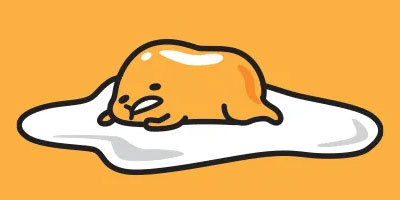

In [20]:
test_image = Image.open("./imgs/GDTM.jpg").convert("RGB")
display(test_image)

Run inference:

In [21]:
result = img_captioner(test_image)
print(result[0]["generated_text"])

a cartoon character is laying on a fried egg


### Other image description models:

- [`VIT`](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)
- [`LLAVA`](https://huggingface.co/llava-hf/llava-interleave-qwen-0.5b-hf)

In [23]:
vit_captioner = pipeline(
  "image-to-text",
  model="nlpconnect/vit-gpt2-image-captioning"
)

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--nlpconnect--vit-gpt2-image-captioning. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.49.0"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id"

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Device set to use cuda:0


In [29]:
result = vit_captioner(test_image)
print(result[0]["generated_text"])

a cartoon character with a hat on a cake 


In [25]:
llava_captioner = pipeline(
  "image-text-to-text",
  model="llava-hf/llava-interleave-qwen-0.5b-hf"
)

config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--llava-hf--llava-interleave-qwen-0.5b-hf. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/126 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/169 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/101 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

Device set to use cuda:0


In [26]:
prompt = [{
  "role": "user",
  "content": [
    {"type": "image", "image": test_image},
    {"type": "text", "text": "Describe the image"},
  ],
}]

In [28]:
result = llava_captioner(text=prompt, max_new_tokens=32, return_full_text=False)
print(result[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:151645 for open-end generation.


The image features a cartoon character that appears to be a character from the animated series "Sesame Street." The character is depicted with a large, round body


## Depth [Prediction](https://huggingface.co/depth-anything/Depth-Anything-V2-Base-hf)

In [30]:
depth_estimator = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Base-hf")

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--depth-anything--Depth-Anything-V2-Base-hf. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/390M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/775 [00:00<?, ?B/s]

Device set to use cuda:0


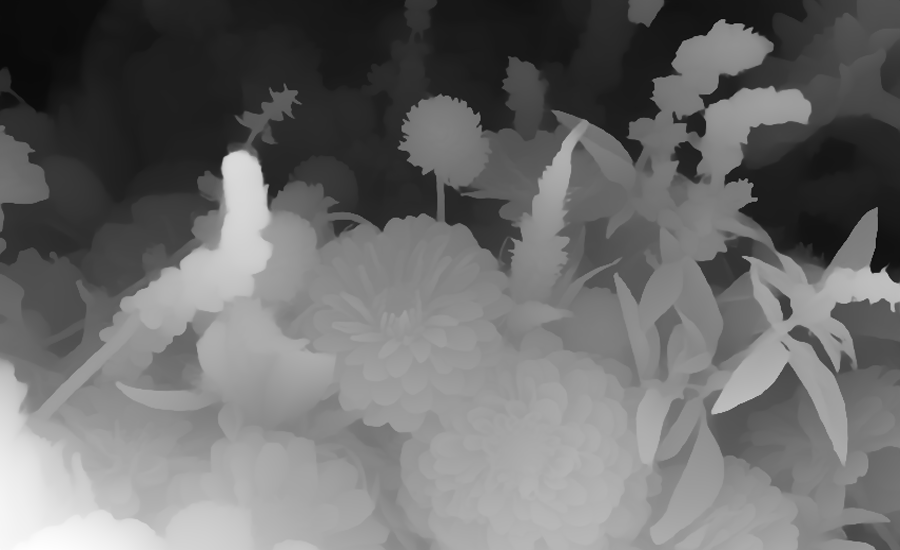

In [31]:
image = Image.open("./imgs/flowers.jpg")
result = depth_estimator(image)
display(result["depth"])

## Object [Detection](https://huggingface.co/facebook/detr-resnet-101)

Some models don't work with the pipeline inference object, but the Transformers library still has some consistent-ish interfaces for running these models.

In [32]:
from PIL import Image
from transformers import DetrImageProcessor, DetrForObjectDetection 

from WK05_utils import DetrPostProcessor

In [33]:
OBJ_MODEL = "facebook/detr-resnet-101"
detr_processor = DetrImageProcessor.from_pretrained(OBJ_MODEL, revision="no_timm")
detr_model = DetrForObjectDetection.from_pretrained(OBJ_MODEL, revision="no_timm")

preprocessor_config.json:   0%|          | 0.00/401 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--facebook--detr-resnet-101. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/79.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/243M [00:00<?, ?B/s]

In [34]:
image = Image.open("./imgs/people.jpg")
detr_inputs = detr_processor(images=image, return_tensors="pt")

detr_output = detr_model(**detr_inputs)

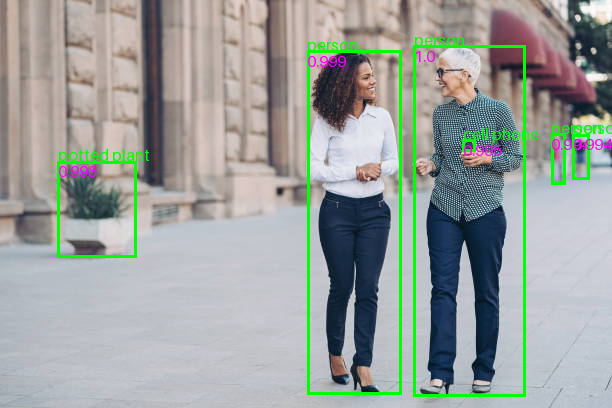

In [35]:
# draw bounding boxes on image
detr_image = DetrPostProcessor.process_output(detr_output, image, detr_model.config.id2label, 0.97)
display(detr_image)

## Image [Segmentation](https://huggingface.co/nvidia/segformer-b1-finetuned-ade-512-512)

Not only detects where objects are, but gives a mask of all pixels that belong to the objects detected.

In [39]:
from PIL import Image
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation

from WK05_utils import SegformerPostProcessor

In [40]:
SEG_MODEL = "nvidia/segformer-b1-finetuned-ade-512-512"
seg_processor = SegformerFeatureExtractor.from_pretrained(SEG_MODEL)
seg_model = SegformerForSemanticSegmentation.from_pretrained(SEG_MODEL)

In [42]:
image = Image.open("./imgs/people.jpg")
seg_inputs = seg_processor(images=image, return_tensors="pt")

seg_output = seg_model(**seg_inputs)
print(seg_output)

SemanticSegmenterOutput(loss=None, logits=tensor([[[[-1.0222e+01, -8.9287e+00, -8.9107e+00,  ..., -7.1432e+00,
           -6.8315e+00, -6.7777e+00],
          [-1.0165e+01, -9.0804e+00, -1.1190e+01,  ..., -7.4658e+00,
           -7.1696e+00, -7.2644e+00],
          [-9.6869e+00, -8.9594e+00, -1.1044e+01,  ..., -7.6515e+00,
           -7.5696e+00, -7.2920e+00],
          ...,
          [-1.1157e+01, -1.1905e+01, -1.2003e+01,  ..., -1.0583e+01,
           -1.0568e+01, -1.0759e+01],
          [-1.0878e+01, -1.1529e+01, -1.2164e+01,  ..., -1.0459e+01,
           -1.0423e+01, -1.0213e+01],
          [-1.0861e+01, -1.1893e+01, -1.2024e+01,  ..., -1.0280e+01,
           -1.0218e+01, -9.7566e+00]],

         [[-3.4238e+00, -2.0946e+00, -1.9417e+00,  ...,  1.0039e-01,
            8.8404e-02,  2.8131e-02],
          [-2.8397e+00, -2.1262e+00, -3.5884e+00,  ..., -1.6904e-01,
           -1.0134e-01, -3.1726e-01],
          [-2.2966e+00, -1.8193e+00, -3.5402e+00,  ..., -2.2002e-01,
           -1.20

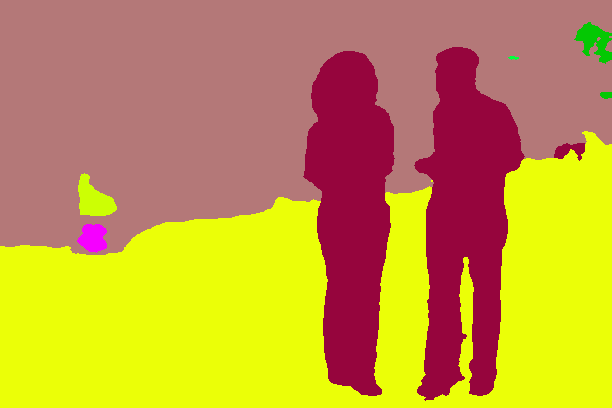

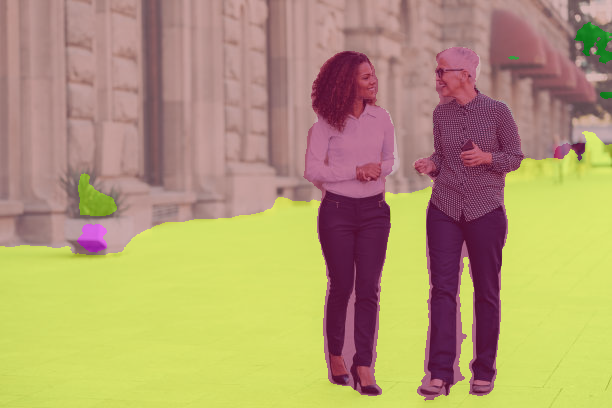

In [43]:
segments_image = SegformerPostProcessor.process_output(seg_output, image)
blended_image = Image.blend(image, segments_image, alpha=0.5)

display(segments_image)
display(blended_image)

## Multi-Modal Image [Comprehension](https://huggingface.co/openai/clip-vit-large-patch14)

Zero-Shot Classification.

Detects presence of objects that weren't part of the training data.

In [44]:
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

In [45]:
CLIP_MODEL = "openai/clip-vit-large-patch14"
clip_processor = CLIPProcessor.from_pretrained(CLIP_MODEL)
clip_model = CLIPModel.from_pretrained(CLIP_MODEL)

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

C:\Users\MC PostLab\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MC PostLab\.cache\huggingface\hub\models--openai--clip-vit-large-patch14. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

In [46]:
LABELS = [
  "cat",
  "dog",
  "bird",
  "fish",
  "aquatic mammal",
  "erinaceinae",
  "vegetation"
]

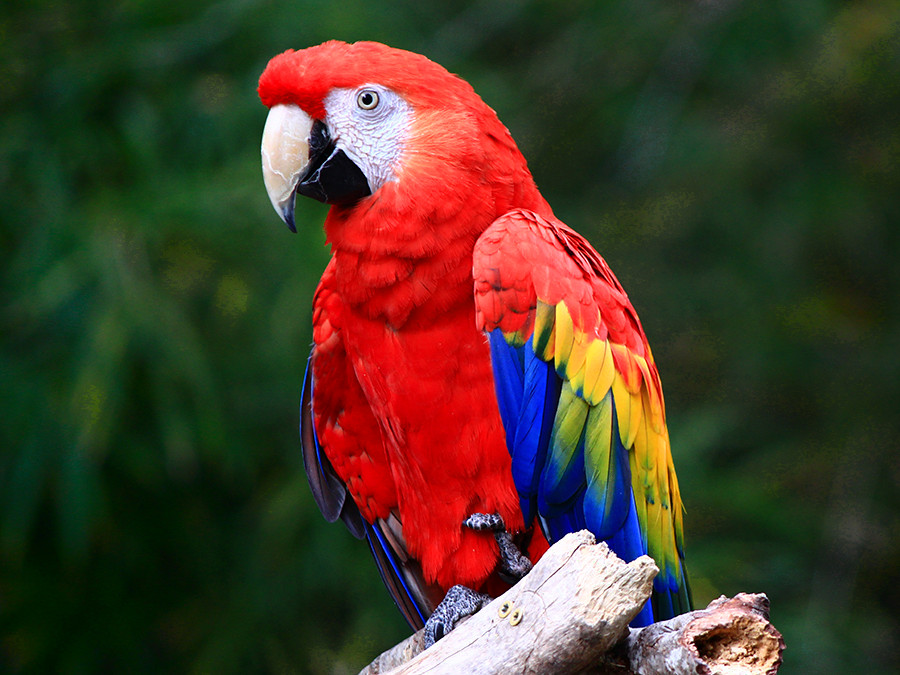

In [49]:
image = Image.open("./imgs/arara.jpg")
display(image)
clip_inputs = clip_processor(text=LABELS, images=image, return_tensors="pt", padding=True)

clip_output = clip_model(**clip_inputs)

In [51]:
clip_output

CLIPOutput(loss=None, logits_per_image=tensor([[14.2142, 15.2668, 21.8401, 13.8016, 14.6925, 17.8014, 14.6001]],
       grad_fn=<TBackward0>), logits_per_text=tensor([[14.2142],
        [15.2668],
        [21.8401],
        [13.8016],
        [14.6925],
        [17.8014],
        [14.6001]], grad_fn=<MulBackward0>), text_embeds=tensor([[ 0.0008, -0.0011,  0.0265,  ..., -0.0115, -0.0083,  0.0040],
        [ 0.0076, -0.0056,  0.0208,  ..., -0.0045, -0.0169,  0.0066],
        [-0.0010,  0.0094,  0.0338,  ..., -0.0056, -0.0149, -0.0145],
        ...,
        [ 0.0132, -0.0021,  0.0073,  ..., -0.0208, -0.0348, -0.0002],
        [-0.0028,  0.0258,  0.0101,  ..., -0.0305, -0.0469,  0.0222],
        [ 0.0373,  0.0296,  0.0131,  ..., -0.0225, -0.0027, -0.0096]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[-3.9906e-02,  9.5973e-03, -7.5905e-03, -3.0101e-02,  1.0613e-02,
         -8.4403e-03,  2.3760e-03,  1.8716e-03, -1.1457e-02, -2.4849e-02,
         -1.3084e-02, -1.0791e-02, -1.0367e

In [50]:
label_idx = clip_output.logits_per_image.argmax(dim=1)
LABELS[label_idx]

'bird'